### Childhood Autistic Spectrum Disorder Screening using Machine Learning

The early diagnosis of neurodevelopment disorders can improve treatment and significantly decrease the associated 
healthcare costs. In this project, we will use supervised learning to diagnose Autistic Spectrum Disorder 
(ASD) based on behavioural features and individual characteristics. More specifically, we will build and deploy a neural network using the Keras API. 

This project will use a dataset provided by the UCI Machine Learning Repository that contains screening data for 292 patients. The dataset can be found at the following URL: 
https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++


In [1]:
#importing libraries
import sys
import pandas as pd
import sklearn
import keras

In [2]:
# import the dataset
file = 'Autism-Child-Data.txt'

# read the csv
data = pd.read_table(file, sep = ',', index_col = None)

In [3]:
# print the shape of the DataFrame, so we can see how many examples we have
print(data.loc[0])

A1_Score                      1
A2_Score                      1
A3_Score                      0
A4_Score                      0
A5_Score                      1
A6_Score                      1
A7_Score                      0
A8_Score                      1
A9_Score                      0
A10_Score                     0
age                           6
gender                        m
ethnicity                Others
jundice                      no
austim                       no
contry_of_res            Jordan
used_app_before              no
result                        5
age_desc           '4-11 years'
relation                 Parent
Class                        NO
Name: 0, dtype: object


In [4]:
# print out multiple patients at the same time
data.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES
5,0,0,1,0,1,1,0,1,0,1,...,m,?,no,yes,Egypt,no,5,'4-11 years',?,NO
6,1,0,1,1,1,1,0,1,0,1,...,m,White-European,no,no,'United Kingdom',no,7,'4-11 years',Parent,YES
7,1,1,1,1,1,1,1,1,0,0,...,f,'Middle Eastern ',no,no,Bahrain,no,8,'4-11 years',Parent,YES
8,1,1,1,1,1,1,1,0,0,0,...,f,'Middle Eastern ',no,no,Bahrain,no,7,'4-11 years',Parent,YES
9,0,0,1,1,1,0,1,1,0,0,...,f,?,no,yes,Austria,no,5,'4-11 years',?,NO


In [5]:
# print out a description of the dataframe
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [6]:
# drop unwanted columns
data = data.drop(['result', 'age_desc'], axis=1)

In [7]:
data.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,'Middle Eastern ',no,no,Jordan,no,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,'United States',no,Parent,YES
5,0,0,1,0,1,1,0,1,0,1,4,m,?,no,yes,Egypt,no,?,NO
6,1,0,1,1,1,1,0,1,0,1,5,m,White-European,no,no,'United Kingdom',no,Parent,YES
7,1,1,1,1,1,1,1,1,0,0,5,f,'Middle Eastern ',no,no,Bahrain,no,Parent,YES
8,1,1,1,1,1,1,1,0,0,0,11,f,'Middle Eastern ',no,no,Bahrain,no,Parent,YES
9,0,0,1,1,1,0,1,1,0,0,11,f,?,no,yes,Austria,no,?,NO


In [8]:
# create X and Y datasets for training
x = data.drop(columns=['Class'])
y = data['Class']

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Autism')

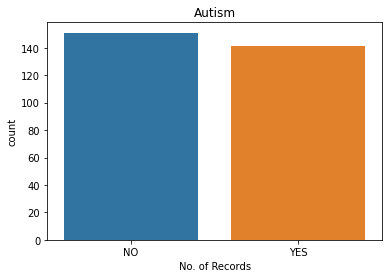

In [30]:
sns.countplot(data.Class)
plt.xlabel('No. of Records')
plt.title('Autism')

In [9]:
x.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,Parent
1,1,1,0,0,1,1,0,1,0,0,6,m,'Middle Eastern ',no,no,Jordan,no,Parent
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,?
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,?
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,'United States',no,Parent
5,0,0,1,0,1,1,0,1,0,1,4,m,?,no,yes,Egypt,no,?
6,1,0,1,1,1,1,0,1,0,1,5,m,White-European,no,no,'United Kingdom',no,Parent
7,1,1,1,1,1,1,1,1,0,0,5,f,'Middle Eastern ',no,no,Bahrain,no,Parent
8,1,1,1,1,1,1,1,0,0,0,11,f,'Middle Eastern ',no,no,Bahrain,no,Parent
9,0,0,1,1,1,0,1,1,0,0,11,f,?,no,yes,Austria,no,?


In [10]:
# convert the data to categorical values - one-hot-encoded vectors
X = pd.get_dummies(x)

In [11]:
# print the new categorical column labels
X.columns.values

array(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age_10', 'age_11', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8',
       'age_9', 'age_?', 'gender_f', 'gender_m',
       "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'",
       'ethnicity_?', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others',
       'ethnicity_Pasifika', 'ethnicity_Turkish',
       'ethnicity_White-European', 'jundice_no', 'jundice_yes',
       'austim_no', 'austim_yes', "contry_of_res_'Costa Rica'",
       "contry_of_res_'Isle of Man'", "contry_of_res_'New Zealand'",
       "contry_of_res_'Saudi Arabia'", "contry_of_res_'South Africa'",
       "contry_of_res_'South Korea'",
       "contry_of_res_'U.S. Outlying Islands'",
       "contry_of_res_'United Arab Emirates'",
       "contry_of_res_'United Kingdom'", "contry_of_res_'United States'",
       'contry_of_res_Afg

In [12]:
# print an example patient from the categorical data
X.loc[1]

A1_Score             1
A2_Score             1
A3_Score             0
A4_Score             0
A5_Score             1
                    ..
relation_?           0
relation_Parent      1
relation_Relative    0
relation_Self        0
relation_self        0
Name: 1, Length: 96, dtype: int64

In [13]:
# convert the class data to categorical values - one-hot-encoded vectors
Y = pd.get_dummies(y)

In [14]:
Y.iloc[:10]

,NO,YES
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,1,0


In [15]:
from sklearn import model_selection
# split the X and Y data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

### Building the Network - Keras


In [16]:
# build a neural network using Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=96, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 776       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 822
Trainable params: 822
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Training the Network

Now it's time for the fun! Training a Keras model is as simple as calling model.fit().

In [17]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=50, batch_size=10, verbose = 1)

Epoch 1/50
24/24 [==============================] - 3s 4ms/step - loss: 0.6886 - accuracy: 0.4893
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.4936
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.5193
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.5966
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6291 - accuracy: 0.6352
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.6953
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5753 - accuracy: 0.7082
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5461 - accuracy: 0.7854
Epoch 9/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5186 - accuracy: 0.8112
Epoch 10/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4949 - accuracy: 0.8240
Epoch 11/50
24/24 [

In [20]:
import numpy as np

In [21]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

predictions =np.argmax(model.predict(X_test), axis=-1)

predictions

2/2 [==============================] - 0s 6ms/step


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [22]:
print('Results for Categorical Model')
print(accuracy_score(Y_test[['YES']], predictions))
print(classification_report(Y_test[['YES']], predictions))

Results for Categorical Model
0.8983050847457628
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.84      0.96      0.90        27

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.91      0.90      0.90        59

